In [ ]:
# Скачивание файла
!wget -O "weather.xls.gz" "https://ru2.rp5.ru/download/files.synop/28/28900.20.11.2020.20.11.2025.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
!gzip -df "weather.xls.gz"

--2025-11-20 15:36:18--  https://ru2.rp5.ru/download/files.synop/28/28900.20.11.2020.20.11.2025.1.0.0.ru.utf8.00000000.xls.gz
Resolving ru2.rp5.ru (ru2.rp5.ru)... 93.90.217.252
Connecting to ru2.rp5.ru (ru2.rp5.ru)|93.90.217.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1183755 (1.1M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.13M   468KB/s    in 2.5s    

2025-11-20 15:36:21 (468 KB/s) - ‘weather.xls.gz’ saved [1183755/1183755]



# Задание 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_excel('weather.xls', skiprows=6)

In [ ]:
data.head(5)

,Местное время в Самаре,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,20.11.2025 16:00,2.6,757.1,770.0,0.7,64.0,"Ветер, дующий с северо-востока",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10,-3.6,NaN,NaN,NaN,NaN,NaN,NaN
1,20.11.2025 13:00,3.3,756.4,769.3,1.1,65.0,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10,-2.8,NaN,NaN,NaN,NaN,NaN,NaN
2,20.11.2025 10:00,1.0,755.3,768.3,1.6,82.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,10,-1.8,NaN,NaN,NaN,NaN,NaN,NaN
3,20.11.2025 07:00,0.8,753.7,766.6,0.4,92.0,"Ветер, дующий с северо-северо-запада",1,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10,-0.3,0.9,12.0,NaN,NaN,NaN,NaN
4,20.11.2025 04:00,0.9,753.3,766.2,0.8,94.0,"Ветер, дующий с северо-северо-запада",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10,0.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Местное время в Самаре', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [ ]:
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Самаре'], dayfirst=True)
data["dayofyear"] = data["date"].dt.dayofyear
data["sin_dayofyear"] = np.sin((data["dayofyear"] - 1) / 366 * 2 * np.pi)
data["cos_dayofyear"] = np.cos((data["dayofyear"] - 1) / 366 * 2 * np.pi)

In [ ]:
data_train = data[data['date'] <= '2024-11-01']
data_test = data[data['date'] > '2024-11-01']

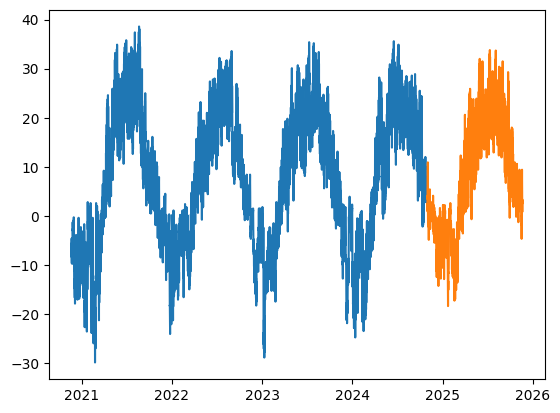

In [ ]:
plt.plot(data_train['date'], data_train['T'])
plt.plot(data_test['date'], data_test['T'])

/tmp/ipython-input-2795462066.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


,model,mae_train,mae_test
0,LinearRegression,11.231828,9.658984


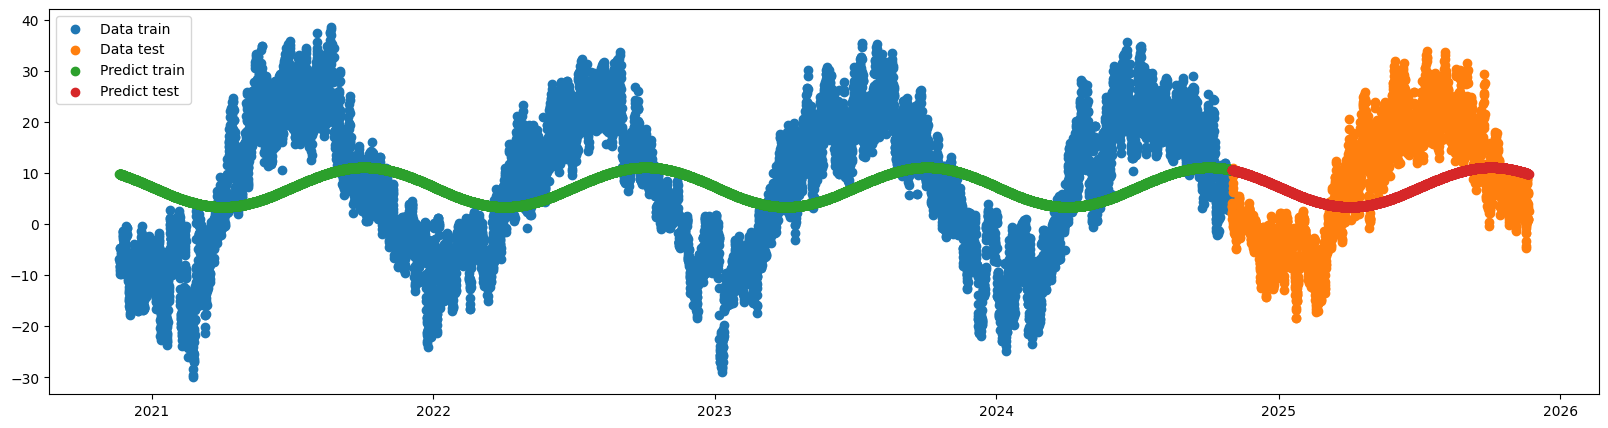

In [ ]:
# уточнение по целевой переменной, тестовой и обучающей выборке
X_train = pd.DataFrame()
X_train['sin_dayofyear'] = data_train['sin_dayofyear']
X_test = pd.DataFrame()
X_test['sin_dayofyear'] = data_test['sin_dayofyear']

y_train = data_train['T']
y_test = data_test['T']


# Создаем модель и обучаем ее
model_Linear = LinearRegression()
model_Linear.fit(X_train, y_train)

# Делаем прогноз
pred_train = model_Linear.predict(X_train)
pred_test = model_Linear.predict(X_test)

# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, label='Data train')
plt.scatter(data_test['date'], y_test, label='Data test')
plt.scatter(data_train['date'], pred_train, label='Predict train')
plt.scatter(data_test['date'], pred_test, label='Predict test')
plt.legend()

# Смотрим на величину ошибки
comparison = pd.DataFrame(columns = ['model', 'mae_train', 'mae_test'])
new_row = pd.DataFrame([{
    'model': 'LinearRegression',
    'mae_train': mean_absolute_error(y_train, pred_train),
    'mae_test': mean_absolute_error(y_test, pred_test)
}])
comparison = pd.concat([comparison, new_row], ignore_index=True)

display(comparison)

# Задание 2

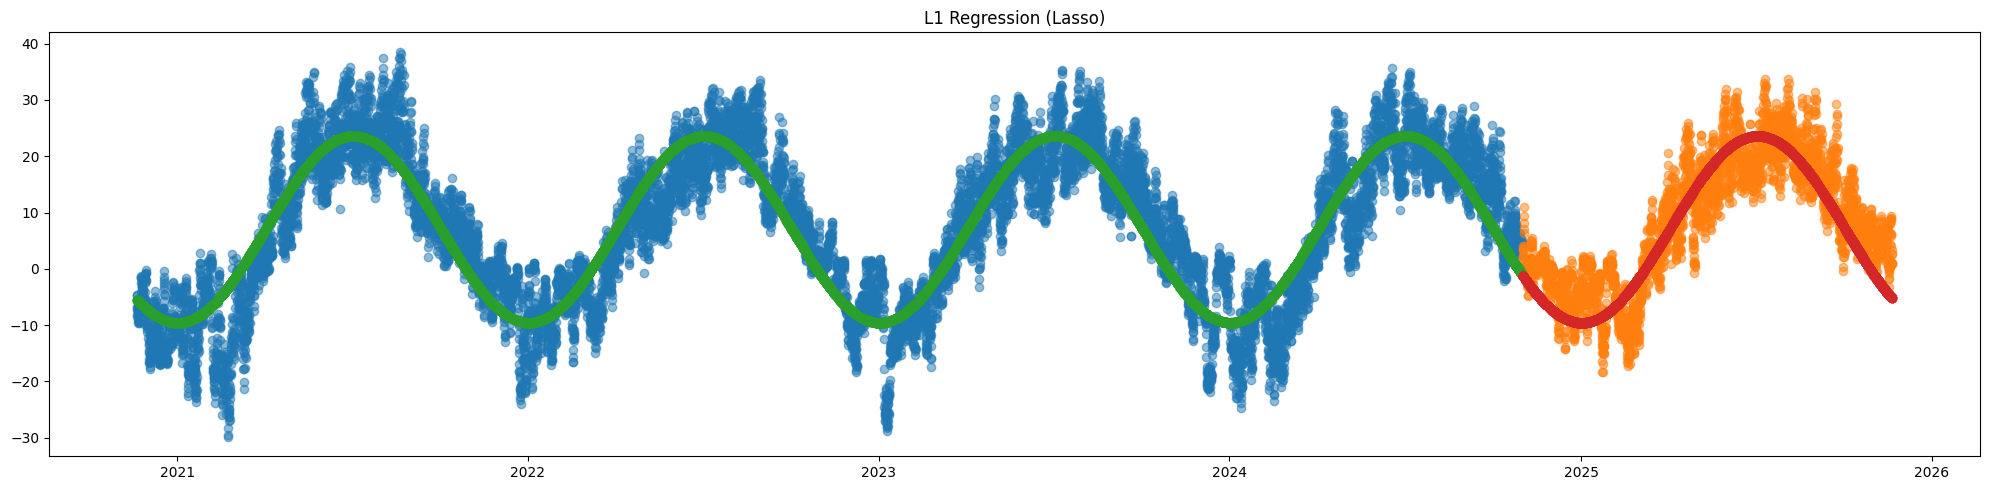

In [ ]:
# Создание и обучение L1 модели
X_train_l1 = pd.DataFrame()
X_train_l1['cos_dayofyear'] = data_train['cos_dayofyear']

X_test_l1 = pd.DataFrame()
X_test_l1['cos_dayofyear'] = data_test['cos_dayofyear']

y_train = data_train['T']
y_test = data_test['T']

model_L1 = Lasso(alpha=0.1)
model_L1.fit(X_train_l1, y_train)

pred_train_L1 = model_L1.predict(X_train_l1)
pred_test_L1 = model_L1.predict(X_test_l1)

# Визуализация
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, alpha=0.5)
plt.scatter(data_test['date'], y_test, alpha=0.5)
plt.scatter(data_train['date'], pred_train_L1, alpha=0.7)
plt.scatter(data_test['date'], pred_test_L1, alpha=0.7)
plt.title('L1 Regression (Lasso)')
plt.tight_layout()
plt.show()

# Задание 3

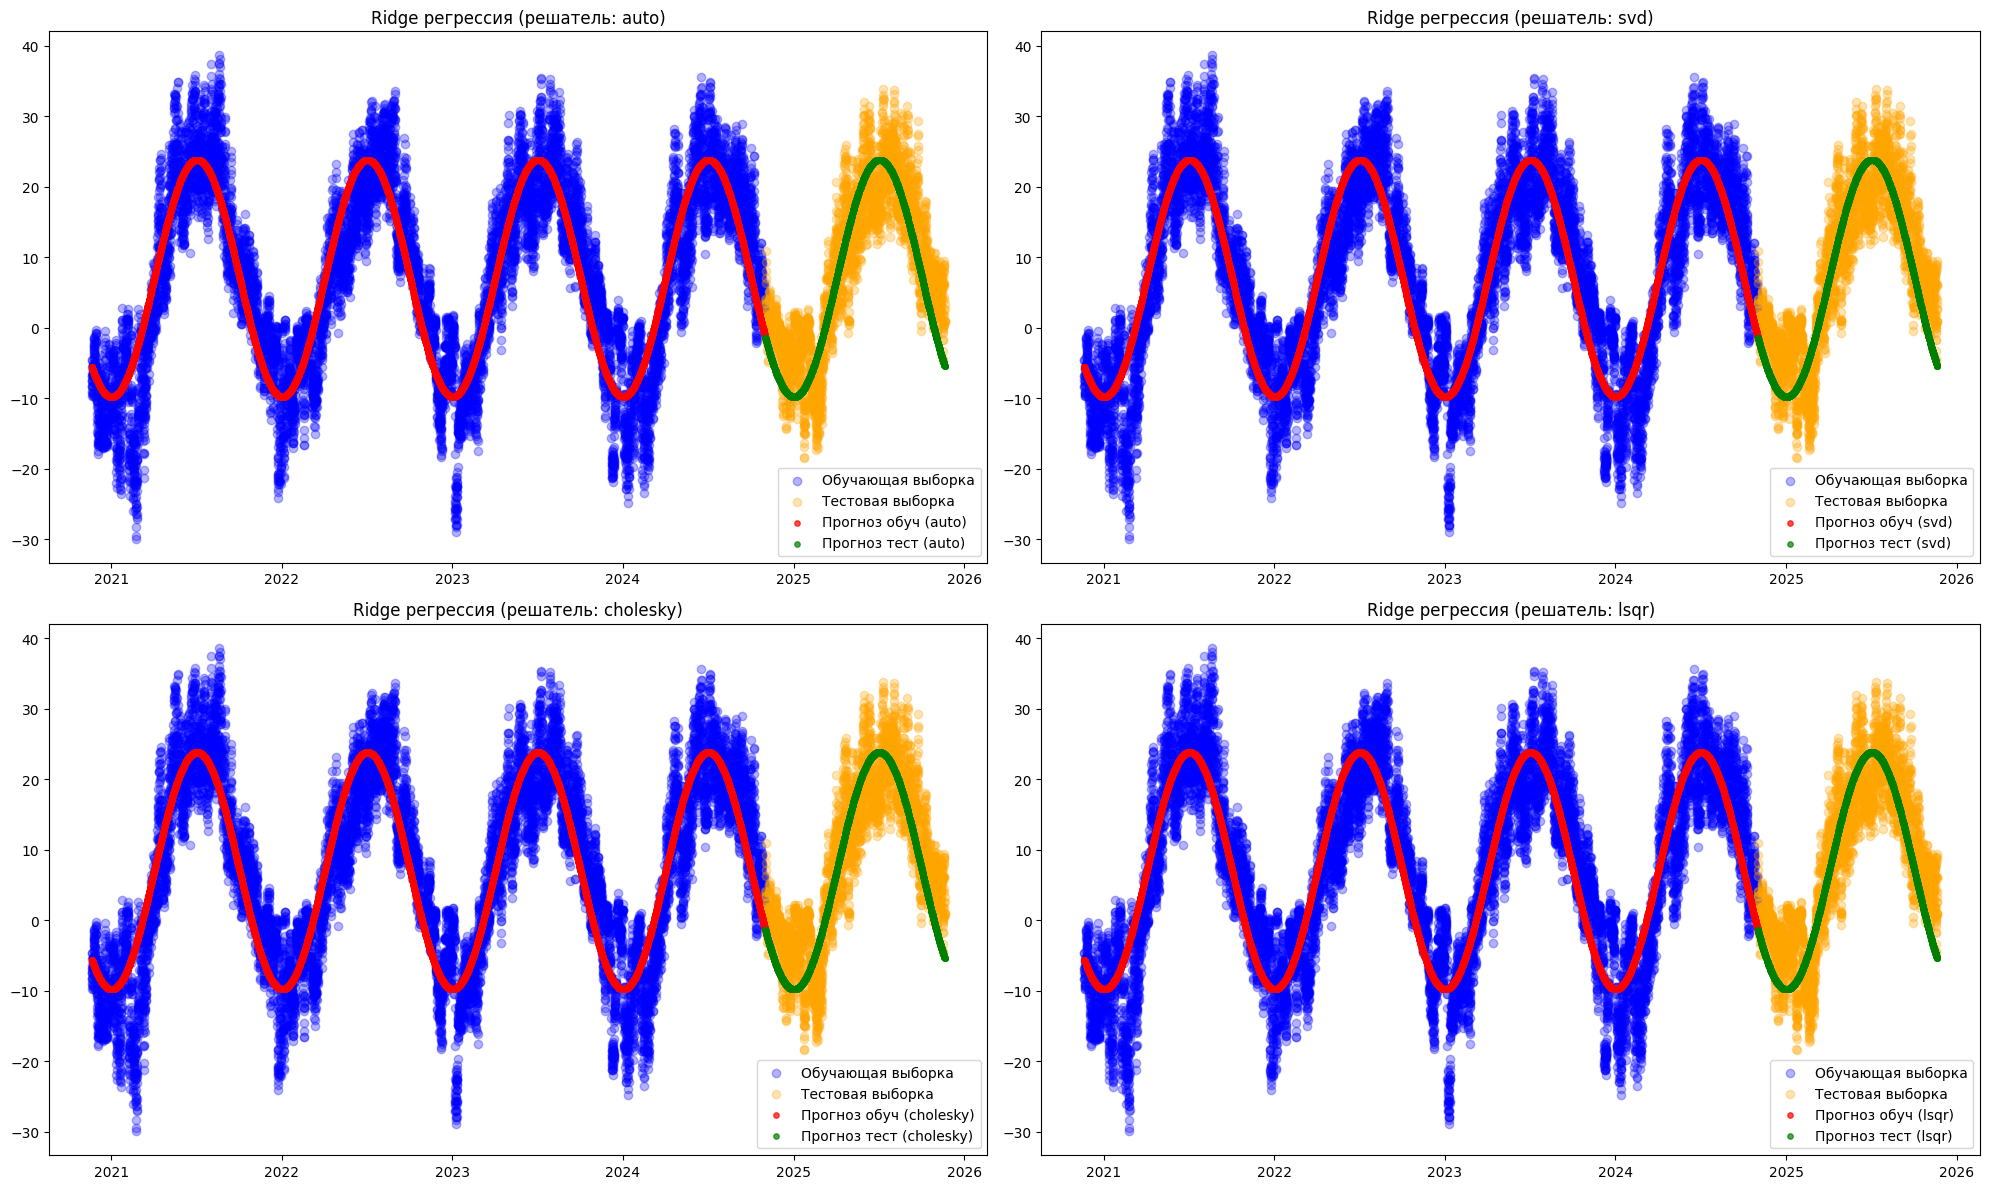

In [ ]:
optimization_methods = ['auto', 'svd', 'cholesky', 'lsqr']


trained_models = {}
model_predictions = {}


for method in optimization_methods:
    regressor = Ridge(alpha=0.1, solver=method)
    regressor.fit(X_train_l1, y_train)
    trained_models[method] = regressor

    train_predictions = regressor.predict(X_train_l1)
    test_predictions = regressor.predict(X_test_l1)

    model_predictions[method] = {
        'training_set': train_predictions,
        'test_set': test_predictions
    }


fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.ravel()

for idx, method in enumerate(optimization_methods):

    axes[idx].scatter(data_train['date'], y_train,
                     label='Обучающая выборка', alpha=0.3, color='blue')
    axes[idx].scatter(data_test['date'], y_test,
                     label='Тестовая выборка', alpha=0.3, color='orange')

    axes[idx].scatter(data_train['date'], model_predictions[method]['training_set'],
                     label=f'Прогноз обуч ({method})', alpha=0.7, s=15, color='red')
    axes[idx].scatter(data_test['date'], model_predictions[method]['test_set'],
                     label=f'Прогноз тест ({method})', alpha=0.7, s=15, color='green')

    axes[idx].set_title(f'Ridge регрессия (решатель: {method})')
    axes[idx].legend()

plt.tight_layout()
plt.show()

